In [457]:
import seaborn as sns

In [458]:
df=sns.load_dataset('tips')

In [459]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [460]:
df.head ()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [461]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [462]:
df.size

1708

In [463]:
df.shape

(244, 7)

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [465]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [466]:
df.nunique()

,0
total_bill,229
tip,123
sex,2
smoker,2
day,4
time,2
size,6


In [467]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [468]:
import matplotlib.pyplot as plt

<Axes: xlabel='total_bill', ylabel='Count'>

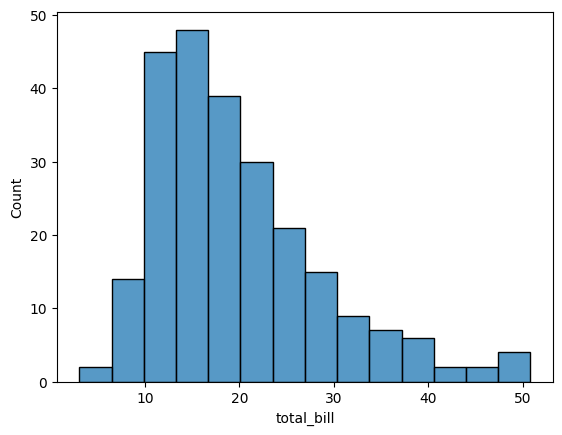

In [469]:
sns.histplot(df['total_bill'])

<Axes: xlabel='tip', ylabel='Count'>

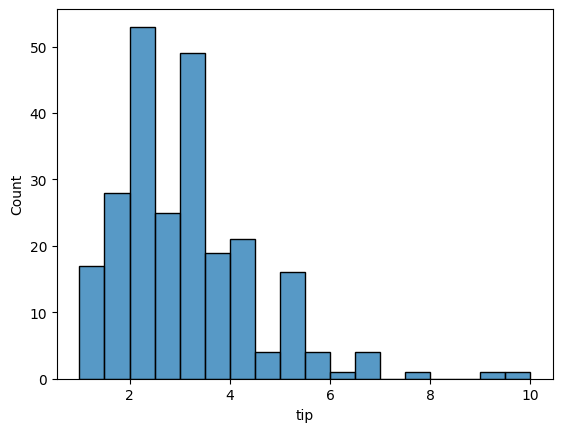

In [470]:
sns.histplot(df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

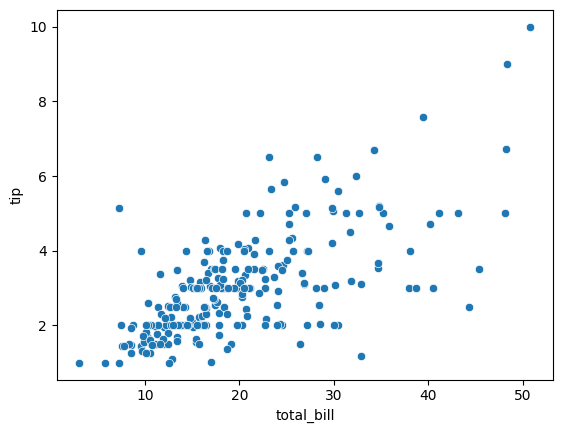

In [471]:
sns.scatterplot(x='total_bill',y='tip',data=df)

In [472]:
df.groupby(['smoker', 'day'])['tip'].mean()

<ipython-input-472-9ed63687a006>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['smoker', 'day'])['tip'].mean()


smoker  day 
Yes     Thur    3.030000
        Fri     2.714000
        Sat     2.875476
        Sun     3.516842
No      Thur    2.673778
        Fri     2.812500
        Sat     3.102889
        Sun     3.167895
Name: tip, dtype: float64

<Axes: xlabel='smoker', ylabel='tip'>

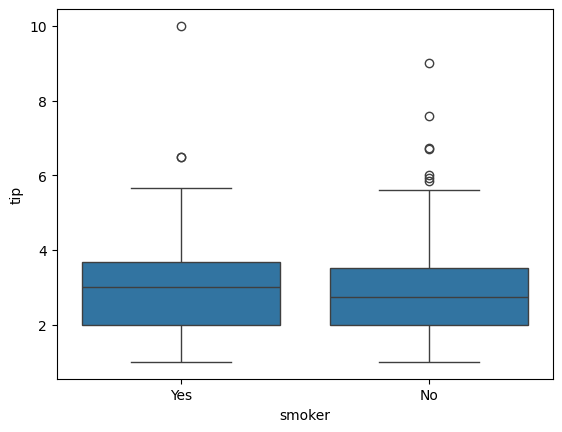

In [473]:
sns.boxplot(x='smoker',y='tip',data=df)

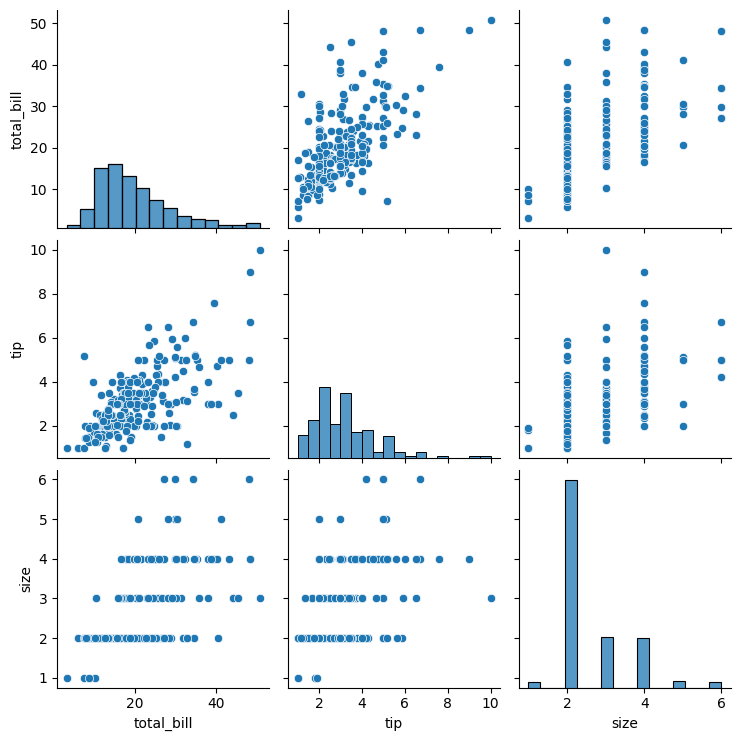

In [474]:
sns.pairplot(df)

In [475]:
from sklearn.preprocessing import LabelEncoder

In [476]:
le=LabelEncoder()

In [477]:
df['smoker']=le.fit_transform(df['smoker'])
df['sex']=le.fit_transform(df['sex'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2
243,18.78,3.00,0,0,3,0,2


In [478]:
x=df.drop('total_bill',axis=1)

In [479]:
y=df['total_bill']

In [480]:
x

,tip,sex,smoker,day,time,size
0,1.01,0,0,2,0,2
1,1.66,1,0,2,0,3
2,3.50,1,0,2,0,3
3,3.31,1,0,2,0,2
4,3.61,0,0,2,0,4
...,...,...,...,...,...,...
239,5.92,1,0,1,0,3
240,2.00,0,1,1,0,2
241,2.00,1,1,1,0,2
242,1.75,1,0,1,0,2


In [481]:
from sklearn.preprocessing import StandardScaler

In [482]:
sc=StandardScaler()

In [483]:
x=sc.fit_transform(x)

In [484]:
y=sc.fit_transform(y.values.reshape(-1,1))

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)


In [487]:
y_train.shape

(163, 1)

In [488]:
y_test.shape

(81, 1)

In [489]:
X_test.shape

(81, 6)

In [490]:
X_train.shape

(163, 6)

In [491]:
pip install --upgrade keras

In [492]:
import keras
from keras import layers
from keras import ops

In [493]:
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

In [494]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [495]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]
)

In [496]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    verbose="auto",
    validation_data=(x_test,y_test)
    )

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1.0982 - mse: 1.0982 - val_loss: 1.2034 - val_mse: 1.2034
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9971 - mse: 0.9971 - val_loss: 1.1343 - val_mse: 1.1343
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0310 - mse: 1.0310 - val_loss: 1.0731 - val_mse: 1.0731
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9688 - mse: 0.9688 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8950 - mse: 0.8950 - val_loss: 0.9679 - val_mse: 0.9679
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8865 - mse: 0.8865 - val_loss: 0.9212 - val_mse: 0.9212
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8657 - mse: 0.8657 - val_loss: 0.8814 - val_mse: 0.8814
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7929 - mse: 0.7929 - val_loss: 0.8473 - val_mse: 0.8473
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7580 - mse: 0.7580 - 

In [497]:
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=32,
    verbose="auto"
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8291 - mse: 0.8291


[0.7904309630393982, 0.7904309630393982]

In [498]:
y_pred=model.predict(x_test, batch_size=32, verbose="auto")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [499]:
y_pred

array([[-0.20460367],
       [-0.1379751 ],
       [-0.03306972],
       [ 1.187263  ],
       [ 0.21671894],
       [ 0.0980278 ],
       [ 0.10277111],
       [ 0.08314193],
       [-0.06815182],
       [ 0.26645738],
       [-0.08004665],
       [-0.16939944],
       [ 0.04566535],
       [ 0.0980278 ],
       [-0.11696844],
       [ 0.30688113],
       [ 0.52521116],
       [-0.03082078],
       [-0.05071352],
       [ 0.70929646],
       [ 0.6967299 ],
       [-0.17290759],
       [ 0.66672784],
       [-0.16732073],
       [ 0.6278607 ],
       [ 0.08748791],
       [-0.15043396],
       [ 1.1176655 ],
       [-0.03306972],
       [ 1.0165548 ],
       [-0.11834239],
       [-0.02943145],
       [ 0.03136838],
       [ 0.3668263 ],
       [ 0.38666695],
       [ 0.8109709 ],
       [ 0.04920828],
       [ 1.8047256 ],
       [ 0.11735196],
       [ 0.0679222 ],
       [-0.14653409],
       [ 0.06027494],
       [-0.11075234],
       [ 0.33910665],
       [ 0.07450924],
       [-0

In [500]:
original_values = sc.inverse_transform(y_pred)

In [501]:
original_values

array([[17.968212],
       [18.56015 ],
       [19.492146],
       [30.333765],
       [21.711306],
       [20.656836],
       [20.698977],
       [20.524588],
       [19.180471],
       [22.15319 ],
       [19.074797],
       [18.280972],
       [20.19164 ],
       [20.656836],
       [18.746777],
       [22.512321],
       [24.451998],
       [19.512127],
       [19.335396],
       [26.087439],
       [25.975796],
       [18.249805],
       [25.709253],
       [18.29944 ],
       [25.363953],
       [20.563198],
       [18.449465],
       [29.715452],
       [19.492146],
       [28.81717 ],
       [18.734571],
       [19.52447 ],
       [20.064625],
       [23.044882],
       [23.22115 ],
       [26.99073 ],
       [20.223116],
       [35.819397],
       [20.828516],
       [20.389374],
       [18.484112],
       [20.321434],
       [18.802002],
       [22.798616],
       [20.447893],
       [19.383472],
       [19.383472],
       [17.321337],
       [21.74943 ],
       [18.006966],
